## Fashion MNIST Classification with CNN 

We're working with the Fashion MNIST dataset,which contains a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

Our goal is to build a CNN model to classify these images.

## Setting Up the Environment

First, we import the necessary libraries:

In [1]:
# importing libraries 

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

## Loading and Preparing the Data

We load the Fashion MNIST dataset from Keras

In [3]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# print the dataset shape 
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Number of classes:", len(np.unique(y_train)))

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Number of classes: 10


## Data Preprocessing

CNN expects input in a specific format (batch size, height, width, channels)

In [4]:
# reshaping the data to include channel dimension
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# normalizing pixel to value [0,1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# converting labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



## Building the CNN Model

We create our 6-layer CNN (which counts both convolutional and dense layers)

In [7]:
# creating the model
model = Sequential([
    # first convolutional layer
    layers.Conv2D(32, (3, 3,), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # third convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu'),

    # flattenning before dense layers
    layers.Flatten(),

    # first dense layer
    layers.Dense(128, activation='relu'),

    # output layer
    layers.Dense(10, activation='softmax')

])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

## Compiling and training the model

In [8]:
# compiling and training model 

model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# training model 
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.7201 - loss: 0.7658 - val_accuracy: 0.8544 - val_loss: 0.3930
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8765 - loss: 0.3424 - val_accuracy: 0.8770 - val_loss: 0.3380
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8963 - loss: 0.2820 - val_accuracy: 0.8938 - val_loss: 0.2902
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9078 - loss: 0.2507 - val_accuracy: 0.8937 - val_loss: 0.2860
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9139 - loss: 0.2315 - val_accuracy: 0.9028 - val_loss: 0.2650
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9246 - loss: 0.2021 - val_accuracy: 0.9093 - val_loss: 0.2572
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9342 - loss: 0.1799 - val_accuracy: 0.9043 - val_loss: 0.2677
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9406 - loss: 0.1603 - val_ac

313/313 - 1s - 3ms/step - accuracy: 0.9072 - loss: 0.2785

Test accuracy: 0.9072


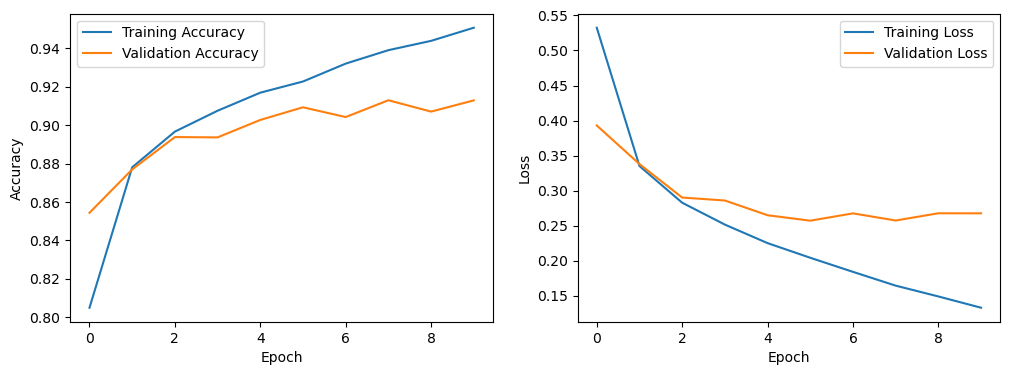

In [9]:
# evaluating the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# plotting the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Ideally, we want both training and validation accuracy to go up and loss to go down, without a big gap between them. Since this visual tells an ideal story, we can conclude from the graph that our model is neither overfitting nor underfitting 

Also, the test accuracy is 90.72% indicating a very good performance on the dataset. A loss that is lower than 0.3 indicated a strong sign that the model is confident.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


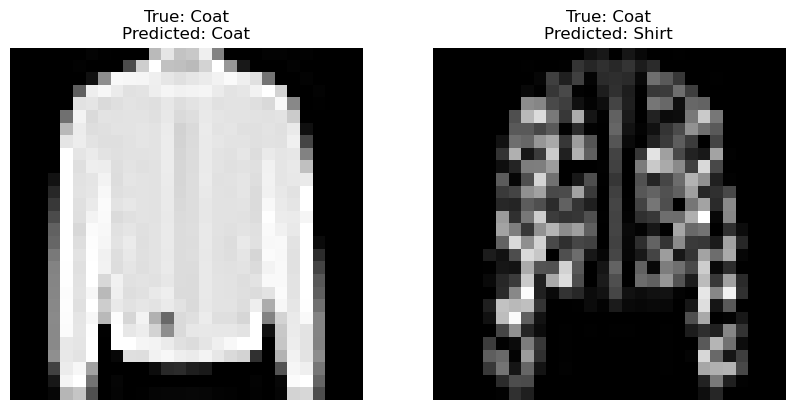

In [10]:
# class names 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# selecting two random test images
sample_indices = np.random.choice(X_test.shape[0], 2)
sample_images = X_test[sample_indices]
sample_labels = np.argmax(y_test[sample_indices], axis=1)

# making predictions
predictions = model.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)

# displaying results
plt.figure(figsize=(10, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[sample_labels[i]]}\nPredicted: {class_names[predicted_classes[i]]}")
    plt.axis('off')
plt.show()

### Image 1:
 The model correctly identified this clothing item, showing it has learned the distinguishing features of a coat in this context.

### Image 2:
In this case, the model misclassified the coat as a shirt. This is a reasonable error, as coats and shirts in the Fashion MNIST dataset can appear similar in grayscale images, especially when visual details like thickness, buttons, or length are ambiguous.

### Conclusion
Overall, the model demonstrates a solid ability to recognize and classify fashion items using image data. While there is room for improvement, particularly in distinguishing visually similar categories like coats and shirts, the current performance is suitable for a proof-of-concept or baseline model.